In [1]:
import numpy as np
import pandas as pd

In [153]:
buy= pd.read_csv('data/buy_remove_low.csv',encoding = 'euc-kr',index_col=0)

C:\Users\admin\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [154]:
f_40 = buy.loc[(buy['sex']=='F')&(buy["age"]==40)]

In [155]:
f_40['datetime']= pd.to_datetime(f_40.date, format='%Y%m%d')

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [156]:
f_40=f_40.iloc[:,1:]

In [9]:
f_40.to_csv('data/f_40.csv',encoding = 'euc-kr')

## 데이터 불러와 매일 산 물품 select로 정리

In [46]:
select = f_40.groupby('sm_cat').count().reset_index().loc[f_40.groupby('sm_cat').count().reset_index().date==730].sm_cat.values

In [47]:
len(select)

153

## 날씨 데이터 전처리

In [169]:
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.font_manager as fm
from matplotlib import rc

In [170]:
font_name = fm.FontProperties(fname = 'C:\\WINDOWS\\Fonts\\malgun.TTF')
font_name.get_name()
rc('font', family = font_name.get_name())

In [157]:
weather_raw = f_40.groupby('date').mean().iloc[:,2:]

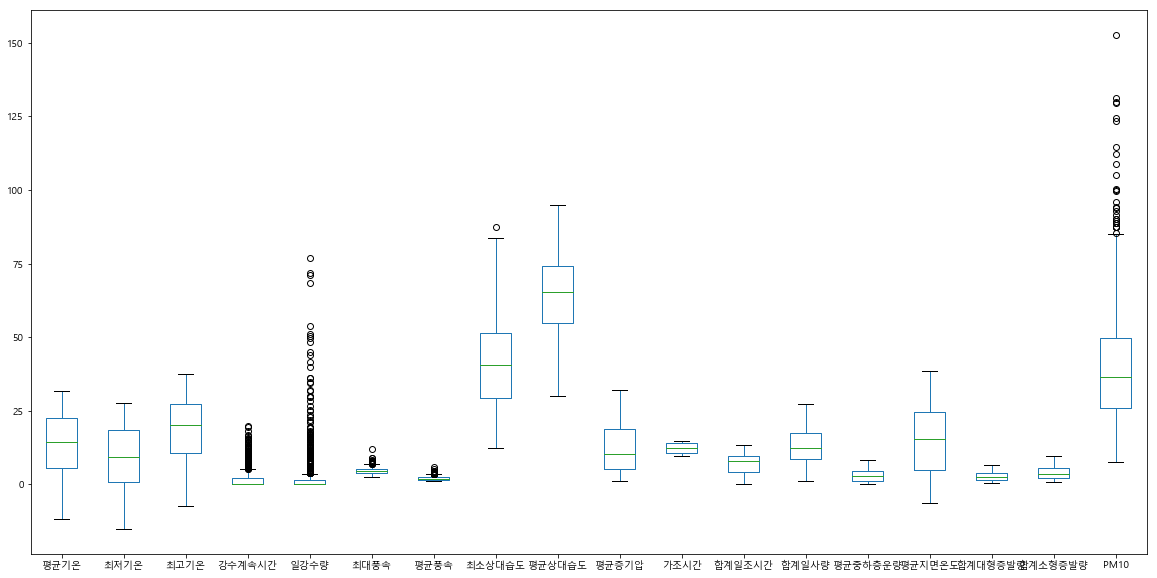

In [59]:
weather_raw.plot.box(figsize=(20,10))

강수계속시간, 일강수량 -> 명목형 데이터로 형식 변경,  
나머지 최대풍속, 평균풍속, PM10 이상치 나타남

기상청에서는 약한비, (보통)비, 강한 비, 매우강한비  
1시간당 3mm 미만, 3~15 미만, 15mm 이상, 30mm이상

- 시간당 2.5mm : 옷이 젖는것은 신경쓰지 않을 정도 물웅덩이가 고이지않음  
- 시간당 6.5mm : 땅에 물웅덩이가 고이고 나뭇잎에도 빗방울이 맺히는 정도
- 시간당 8.5mm : 육안으로 거세진 빗줄기가 보이고, 땅에 떨어지는 빗방울또한 크게보임

In [93]:
weather_raw['호우강도']= 0

In [94]:
rain = weather_raw.일강수량.sort_values()[730-525:].index.values

In [104]:
for i in rain:
    weather_raw.loc[i,['호우강도']]= weather_raw.loc[i,'일강수량'] / weather_raw.loc[i,'강수계속시간]

20190327 : 호우강도량이 이상함. (일강수량이 Null, 강수계속시간이 작은 시간이어서 2000대 까지 올라갔음 )->0

In [124]:
weather_raw.loc[20190327,['호우강도']] =0

C:\Users\admin\Anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\admin\Anaconda3\lib\site-packages\pandas\core\indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


In [125]:
weather_raw.sort_values('호우강도')

,평균기온,최저기온,최고기온,강수계속시간,일강수량,최대풍속,평균풍속,최소상대습도,평균상대습도,평균증기압,가조시간,합계일조시간,합계일사량,평균중하층운량,평균지면온도,합계대형증발량,합계소형증발량,PM10,호우강도
date,,,,,,,,,,,,,,,,,,,
20180101,-0.226793,-4.328181,4.897524,0.000001,0.000001,4.457719,1.661643,23.016449,47.160994,2.709597,9.719286,8.421257,7.645192,0.592546,-0.272308,1.292109,1.859581,41.066448,0.000000
20190208,-3.148019,-7.241578,1.928497,0.000001,0.000001,5.102077,2.295995,20.989796,36.700432,1.841785,10.624095,7.825880,11.894777,1.714306,0.066832,1.785162,2.532731,30.837612,0.000000
20190206,6.122051,0.121909,12.202707,0.000001,0.000001,3.705972,1.373122,33.305296,56.807090,5.289426,10.544919,4.890686,8.714952,3.677226,3.584762,1.586111,2.231744,84.996969,0.000000
20190205,3.346282,-3.117802,10.814471,0.000001,0.000001,3.500317,1.283417,18.766906,45.188109,3.282813,10.528939,8.152347,11.887178,0.588518,2.485674,1.909790,2.770273,85.303916,0.000000
20190204,1.646504,-1.420323,5.731190,0.000001,0.000001,5.315484,2.316368,18.277989,41.838735,2.773858,10.466413,8.780732,12.638219,0.227217,2.306445,2.125366,3.055708,78.154665,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20190624,23.431615,19.058680,28.940032,0.003190,0.031787,4.466226,1.970652,42.355345,62.197539,17.290174,14.668285,12.594197,25.582972,1.904255,30.084423,5.394594,7.708687,24.800619,9.965278
20181218,2.840682,-2.077365,8.764435,0.000001,0.000028,4.618173,1.485164,39.451533,63.650380,4.660653,9.668877,7.024757,7.909968,2.351363,0.340570,1.283239,1.850841,47.694981,27.621421
20180202,-1.663190,-6.966909,4.585003,0.000001,0.000045,4.198649,1.732542,22.423443,47.811168,2.392499,10.433619,8.224997,8.917673,0.623337,-1.689022,1.484090,2.165817,49.237425,45.236382


In [129]:
(weather_raw.호우강도 >= 30).sum()

3

In [151]:
id(weather)

1123409558720

In [152]:
id(weather_raw)

1123366098200

In [149]:
weather = weather_raw.copy()

In [131]:
weather['호우강도']= np.where(weather_raw.호우강도 >= 30,'매우강한비',
                         np.where(weather_raw.호우강도 >= 15,'강한비',
                                 np.where(weather_raw.호우강도 >= 3,'보통비',
                                         '비안옴')))

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [135]:
weather.columns

Index(['평균기온', '최저기온', '최고기온', '강수계속시간', '일강수량', '최대풍속', '평균풍속', '최소상대습도',
       '평균상대습도', '평균증기압', '가조시간', '합계일조시간', '합계일사량', '평균중하층운량', '평균지면온도',
       '합계대형증발량', '합계소형증발량', 'PM10', '호우강도'],
      dtype='object')

In [137]:
f_40_wheater = weather[['평균기온', '최저기온', '최고기온', '최대풍속', '평균풍속', '최소상대습도',
       '평균상대습도', '평균증기압', '가조시간', '합계일조시간', '합계일사량', '평균중하층운량', '평균지면온도',
       '합계대형증발량', '합계소형증발량', 'PM10',]]

In [48]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:35: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eps=np.finfo(np.float).eps,
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:597: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eps=np.finfo(np.float).eps, copy_X=True, fit_path=Tru

In [192]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [ ]:
plt.figure(figsize=(10,10))
cumVar = np.cumsum(np.round(pca_wheater.explained_variance_ratio_,decimals=4)*100)
plt.xticks(range(len(pca_wheater.explained_variance_ratio_)))
plt.plot(cumVar,marker = 'o',c='b')
plt.grid()

In [ ]:
X_pca.plot.line(x='datetime',y=0,figsize=(10,10))
X_pca.plot.line(x='datetime',y=1,figsize=(10,10))

In [199]:
i

'흰우유'

In [201]:
i='감귤/한라봉/오렌지'

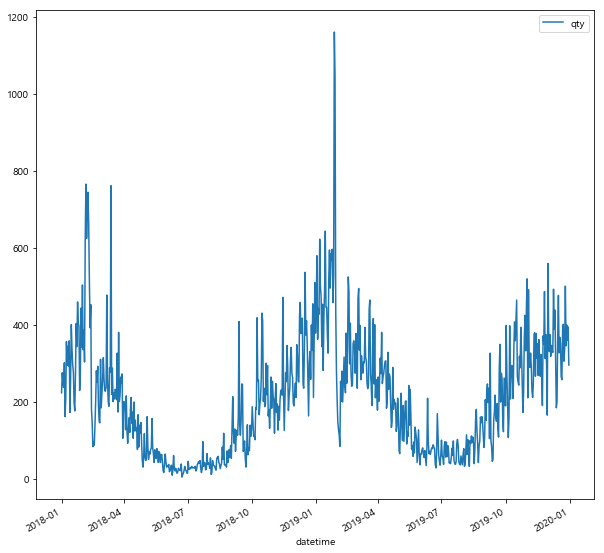

In [208]:
f_40.loc[f_40.sm_cat==i,['qty','datetime']].plot.line(x='datetime',y='qty',figsize=(10,10))

In [198]:
for i in select:
    scaler = StandardScaler()
    scaler.fit(f_40_wheater.values)
    wheater_scaled = scaler.transform(f_40_wheater.values)
    pca_wheater = PCA()
    pca_wheater.fit(wheater_scaled)

    X_pca_wheater = pca_wheater.transform(wheater_scaled)

    X_pca = pd.DataFrame(X_pca_wheater).iloc[:,:2]

    X_pca['datetime']= pd.to_datetime(weather.index.values, format='%Y%m%d')


    onehot = pd.get_dummies(weather[['호우강도']])

    onehot['datetime']= pd.to_datetime(weather.index.values, format='%Y%m%d')

    X = pd.merge(X_pca,onehot,how = 'inner',on = 'datetime')

    X = X[[0,1,'호우강도_강한비','호우강도_매우강한비','호우강도_보통비','호우강도_비안옴']]

    y = f_40.loc[f_40.sm_cat==i,['qty']]

    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.1, random_state = 30)

    lin = LinearRegression()
    lin.fit(X_train,y_train)
    lin.score(X_train, y_train)
    if lin.score(X_test, y_test)> 0.4:
        print(i)
        print( "SS(coef)=", lin.coef_)
        print( "R²=", lin.score(X_test, y_test) )

감귤/한라봉/오렌지
SS(coef)= [[ 41.7241518   -1.97986347  27.13611665 -22.52029362   3.26033975
   -7.87616278]]
R²= 0.47694059882910916
